In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [21]:
birth= pd.read_csv("C:\\Users\\user\\Desktop\\dataset\\birthAttendedBySkilledPersonal.csv")

In [22]:
birth.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2018,Births attended by skilled health personnel (%),58.8
1,Afghanistan,2017,Births attended by skilled health personnel (%),53.4
2,Afghanistan,2015,Births attended by skilled health personnel (%),50.5
3,Afghanistan,2014,Births attended by skilled health personnel (%),45.2
4,Afghanistan,2012,Births attended by skilled health personnel (%),39.9


In [23]:
allCountries =birth['Location'].unique().tolist()

In [24]:
def compareCountries(countries):
    fig = plt.figure(figsize = (10,10))
    ax1 = plt.subplot2grid((1,1),(0,0))

    for country in countries:
        if country not in allCountries:
            print(f"Country {country} DO NOT EXIST ")
            return
        tempData = birth[birth['Location'] == country]
        tempData['Period'] = pd.to_datetime(tempData['Period'], format = '%Y')
        ax1.plot(tempData['Period'], tempData['First Tooltip'], label=country)
        
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    plt.grid()
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Number of Birth Attended in Skilled Percentage")
    plt.title("Number of Birth Ateendened By Skilled Percentage in %")
    plt.show()

In [25]:
def autoLabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, '%d'%int(height), ha='center', va = 'bottom')

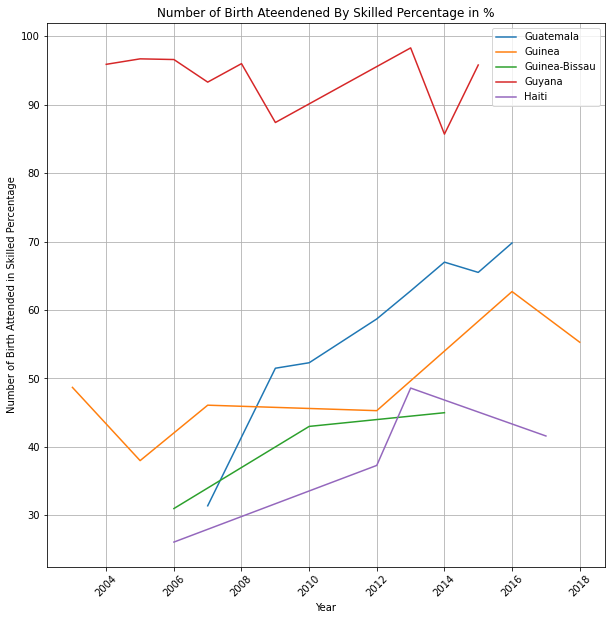

In [26]:
import random
i=random.randint(0,len(allCountries)-5)
countries=allCountries[i:i+5]
compareCountries(countries)
    

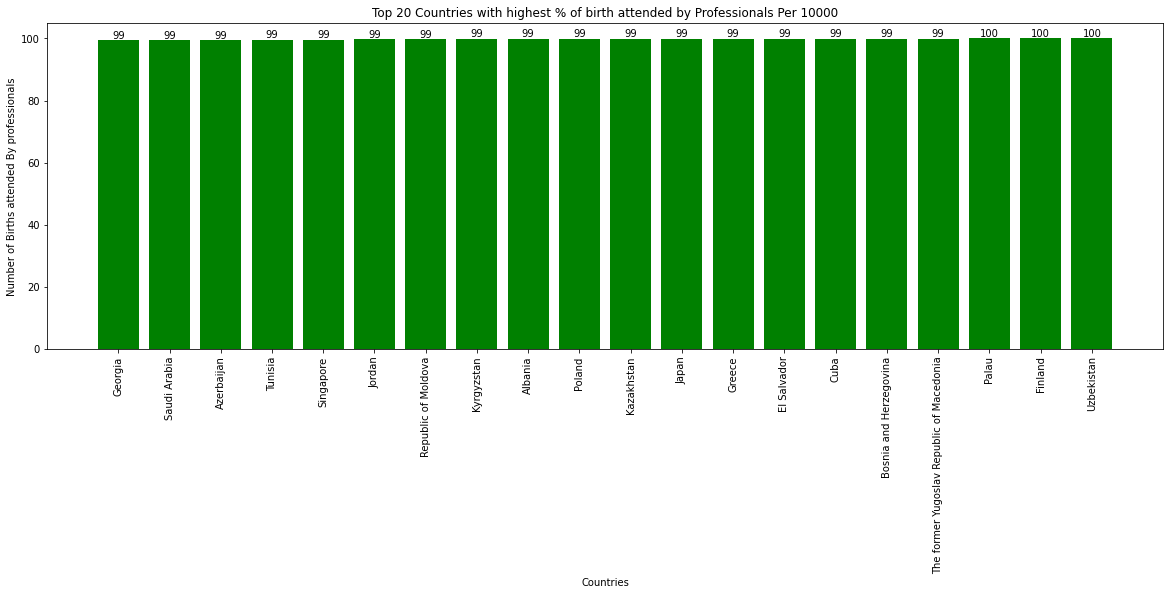

In [27]:
tempData = birth[birth['Period'] == 2018]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "green")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Number of Births attended By professionals")
plt.title("Top 20 Countries with highest % of birth attended by Professionals Per 10000")
plt.show()

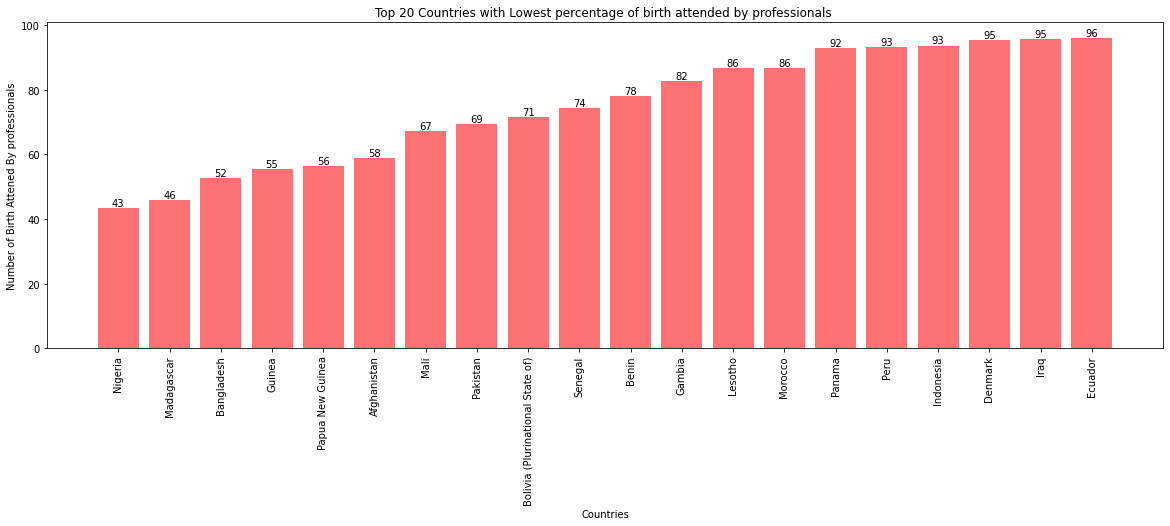

In [28]:
tempData = birth[birth['Period'] == 2018]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[:20]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Number of Birth Attened By professionals")
plt.title("Top 20 Countries with Lowest percentage of birth attended by professionals ")
plt.show()

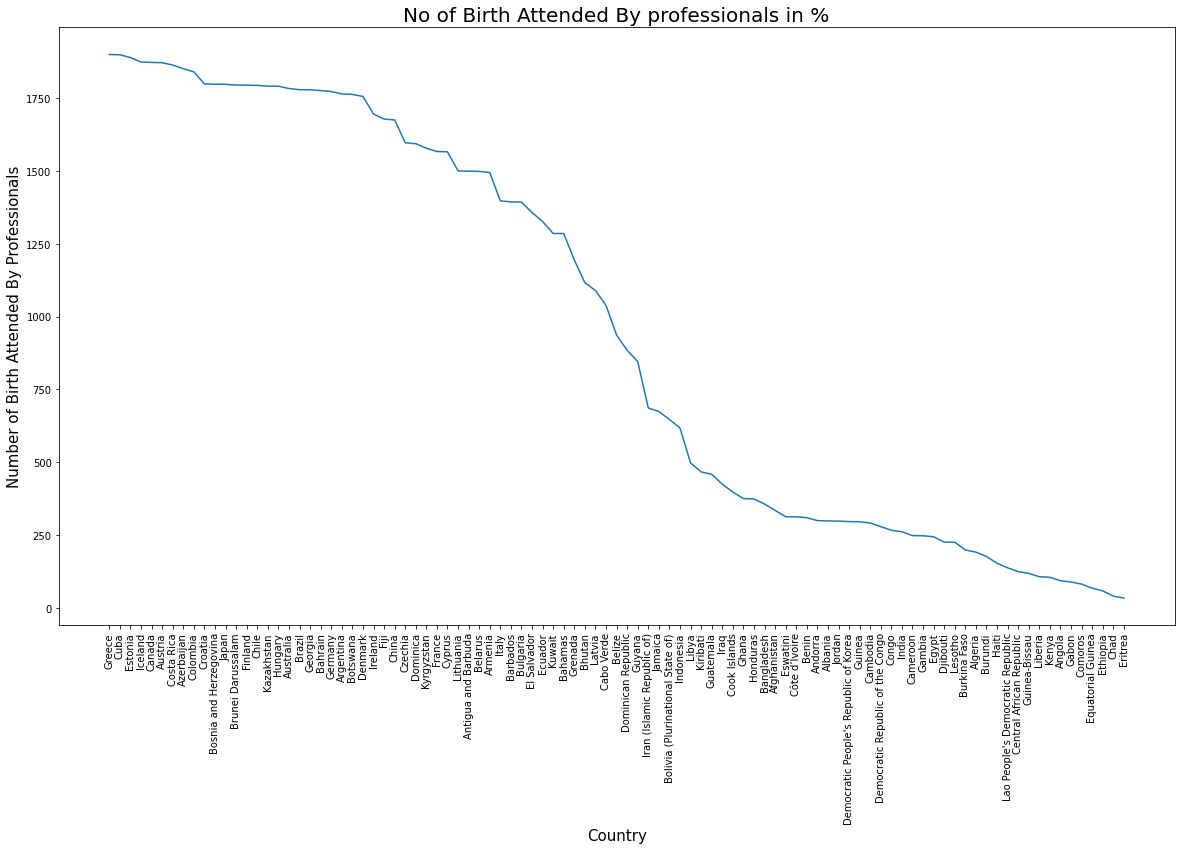

In [34]:
df = birth[birth['Location']=='Afghanistan']
water_sort = pd.DataFrame([])
water_sort0 = []
water_sort1 = []
index = []

for i in np.unique(birth['Location'][:1000]):
    water_sort0.append(i)
    water_sort1.append(birth['First Tooltip'][birth['Location']==i].sum())
    index.append(list(birth['Location'][birth['Location']==i].index)[0])
    
water_sort['Name'] = water_sort0
water_sort['Value'] = water_sort1
water_sort.index = index
water_sort = water_sort.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(20, 11))
plt.plot(water_sort['Name'], water_sort['Value'])
plt.title('No of Birth Attended By professionals in %', size=20)
plt.xlabel('Country', size=15)
plt.ylabel('Number of Birth Attended By Professionals', size=15)
plt.xticks(rotation=90, size=10)
plt.show()

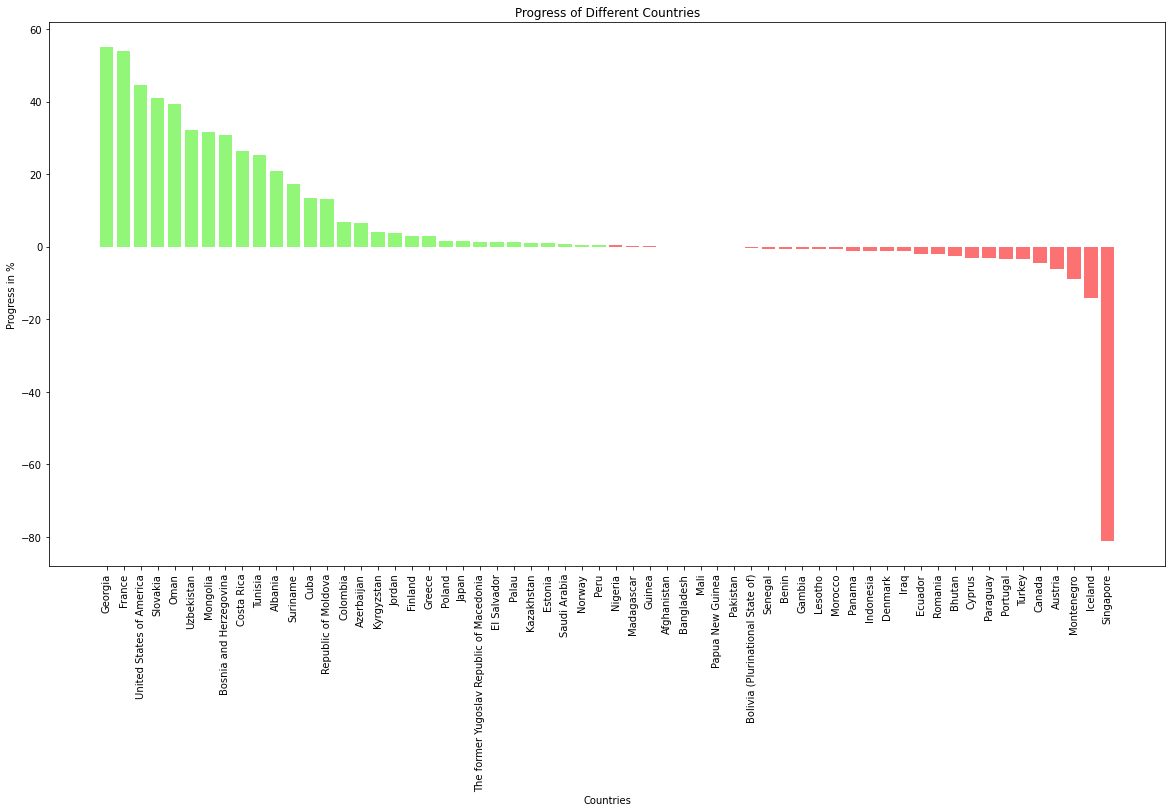

In [36]:

tempData2018 = birth[birth['Period'] == 2018]
tempData2000 = birth[birth['Period'] == 2000]
tempData2018.reset_index(inplace=True)
tempData2000.reset_index(inplace=True)
tempData = tempData2018.join(tempData2000, lsuffix='_18', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_18']
tempData = tempData[['Location_18', 'progress']].sort_values('progress', ascending=False)
tempDataTop = tempData[-30:]
tempDataBot = tempData[:30]

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
rects1 = ax1.bar(tempDataTop['Location_18'], tempDataBot['progress'], color = '#92f779')
rects1 = ax1.bar(tempDataBot['Location_18'], tempDataTop['progress'], color = '#fc7272')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.xlabel("Countries")
plt.ylabel("Progress in %")
plt.title("Progress of Different Countries")
plt.show()